In [27]:
import numpy as np
import matplotlib.pyplot as plt
from Levenberg_Marquardt_yq import Levenberg_Marquardt_yq
from scipy.io import loadmat
from linearLSQ import linearLSQ


# 2. Rosenbrock function

## 1. Calculate the Jacobian by hand

## 2. Implement a Matlab function to calculate r and J with a given x.

In [28]:
def fun_rJ_Rosen(x):
   def r(x):
       return np.array(np.sqrt(2)* np.array([10*(x[1]-x[0])**2, 1-x[0]]))

   def J(x):
      return np.array(np.sqrt(2) * np.array([[-20*(x[1]-x[0]), 20*(x[1]-x[0])], [-1, 0]]))

   return r(x), J(x)


## 3. Call the function Levenberg_Marquardy_yq 
Set the starting point as x0 = [−1.2,1]T and the initial λ as 10−3

In [29]:
x0 = [-1.2,1]
_,J = fun_rJ_Rosen(x0)
tau = 1e-3 

In [30]:
x_star, stats = Levenberg_Marquardt_yq(fun_rJ_Rosen, x0,tau)
stats['iter']

16

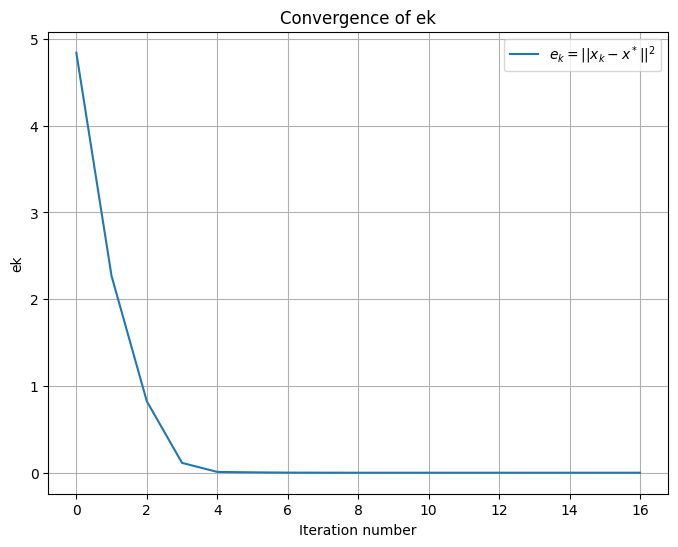

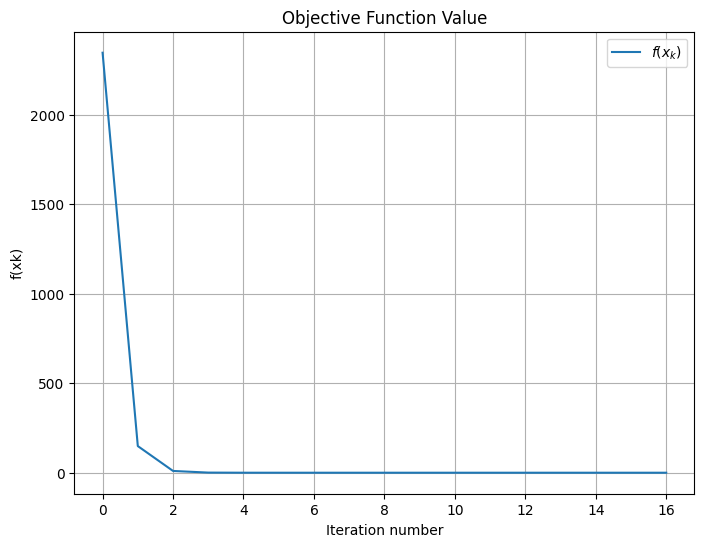

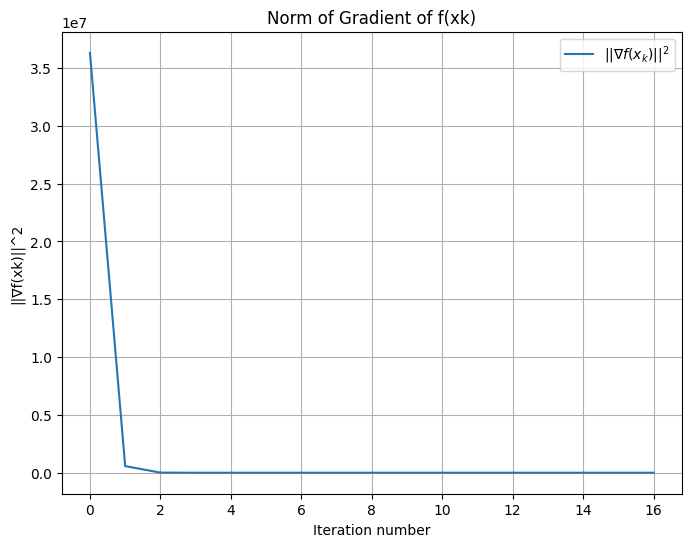

In [31]:
# Calculate ek
ek = np.linalg.norm(stats["X"] - x_star, axis=1)**2

# Plot ek as a function of the iteration number
plt.figure(figsize=(8, 6))
plt.plot(np.arange(0, stats["iter"]+1), ek, label='$e_k = ||x_k - x^*||^2$')
plt.xlabel('Iteration number')
plt.ylabel('ek')
plt.legend()
plt.title('Convergence of ek')
plt.grid(True)
plt.show()

# Plot f(xk) as a function of the iteration number
plt.figure(figsize=(8, 6))
plt.plot(np.arange(0, stats["iter"]+1), stats["F"], label='$f(x_k)$')
plt.xlabel('Iteration number')
plt.ylabel('f(xk)')
plt.legend()
plt.title('Objective Function Value')
plt.grid(True)
plt.show()

# Calculate ∥∇f(xk)∥2
norm_dF = np.linalg.norm(stats["dF"], axis=1)**2

# Plot ∥∇f(xk)∥2 as a function of the iteration number
plt.figure(figsize=(8, 6))
plt.plot(np.arange(0, stats["iter"]+1), norm_dF, label='$||∇f(x_k)||^2$')
plt.xlabel('Iteration number')
plt.ylabel('||∇f(xk)||^2')
plt.legend()
plt.title('Norm of Gradient of f(xk)')
plt.grid(True)
plt.show()


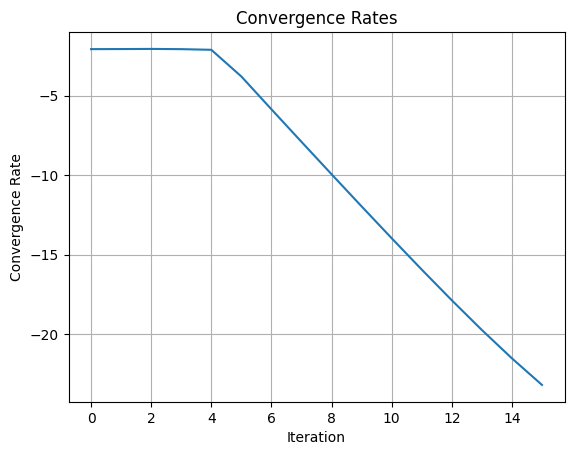

In [32]:
df = stats['dF']

# Calculate the Euclidean norms of the gradients
norms = [np.linalg.norm(df[i]) for i in range(len(df))]

# Calculate the convergence rate for each iteration
rates = [np.log(norms[i] / max(1, norms[i-1])) for i in range(1, len(norms))]

# Plot the convergence rates
plt.figure()
plt.plot(rates)
plt.xlabel('Iteration')
plt.ylabel('Convergence Rate')
plt.title('Convergence Rates')
plt.grid(True)  # Add grid
plt.show()


# 3. Linear least squares

In [33]:
# Load the data from the .mat file
data = loadmat('data_exe3_2023.mat')

# Access variables from the loaded data
t = data['t']  
y = data['y']  

t = t.ravel()  # or t.flatten()
y = y.ravel()


In [42]:
A =  np.column_stack([np.exp(-27*t), np.exp(-8*t), np.ones_like(t)])
# Perform linear least-squares fitting for n=2
c = linearLSQ(A, y)
r = y - np.dot(A, c)
std = np.linalg.norm(r) / np.sqrt(A.shape[0] - A.shape[1])

#Linalg norm between x* and x (the parameters)
original_coef = [1.27, 2.04, 0.3]
error = np.linalg.norm(original_coef-c)

print("Original Coefficients:", original_coef)
print("Fitted Coefficients (c):", c)
print("L2 Norm (Error):", error)

Original Coefficients: [1.27, 2.04, 0.3]
Fitted Coefficients (c): [0.77158691 2.68426325 0.23270323]
L2 Norm (Error): 0.8173246631410955


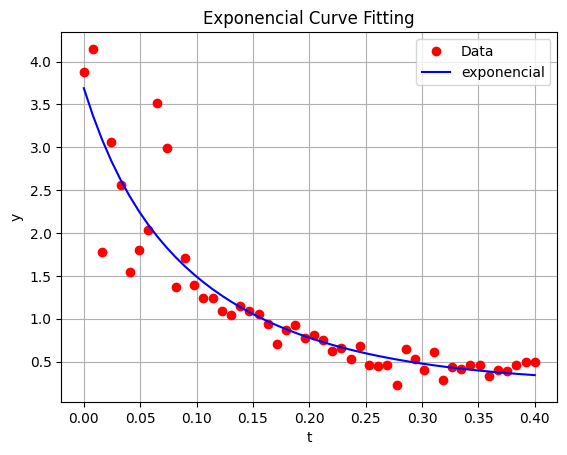

In [35]:
# Plot the data and fitted curves
plt.figure()
plt.plot(t, y, 'ro', label='Data')
plt.plot(t, np.dot(A, c), 'b', label='exponencial')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Exponencial Curve Fitting')
plt.grid(True)
plt.show()


In [48]:
# The first 10 data points have a standard deviation of 0.5, and the rest have 0.1
noise_std = np.array([0.5] * 10 + [0.1] * 40)

# Define the weight matrix W based on the noise standard deviations
W = np.diag(1 / (noise_std ** 2))

# Compute the weighted least squares (WLS) solution
c_WLS = np.linalg.lstsq(A.T @ W @ A, A.T @ W @ y, rcond=None)[0]

# Calculate the absolute error
e_WLS = original_coef-c_WLS

# Compute the 2-norm of the absolute error
norm_error_WLS = np.linalg.norm(e_WLS)

# Display the coefficients and the error for both LSQ and WLS
print("Linear Least Squares (LSQ):")
print("Coefficients (c):", c)
print("2-Norm of Absolute Error:", error)

print("\nWeighted Least Squares (WLS):")
print("Coefficients (c_WLS):", c_WLS)
print("2-Norm of Absolute Error (WLS):", norm_error_WLS)

Linear Least Squares (LSQ):
Coefficients (c): [0.77158691 2.68426325 0.23270323]
2-Norm of Absolute Error: 0.8173246631410955

Weighted Least Squares (WLS):
Coefficients (c_WLS): [1.19093158 2.27343584 0.27840347]
2-Norm of Absolute Error (WLS): 0.24740759368440002


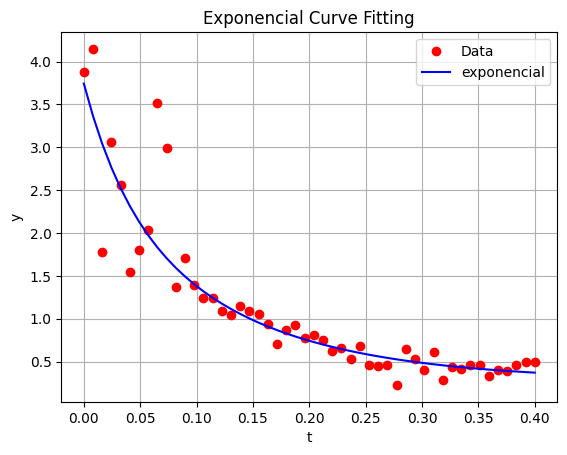

In [49]:
# Plot the data and fitted curves
plt.figure()
plt.plot(t, y, 'ro', label='Data')
plt.plot(t, np.dot(A, c_WLS), 'b', label='exponencial')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Exponencial Curve Fitting')
plt.grid(True)
plt.show()